Resultados en el conjunto de prueba:
Error absoluto medio (MAE): 8.3994172290964
Error cuadrático medio (MSE): 125.39567296562214
Coeficiente de determinación (R²): 0.6825386992299813


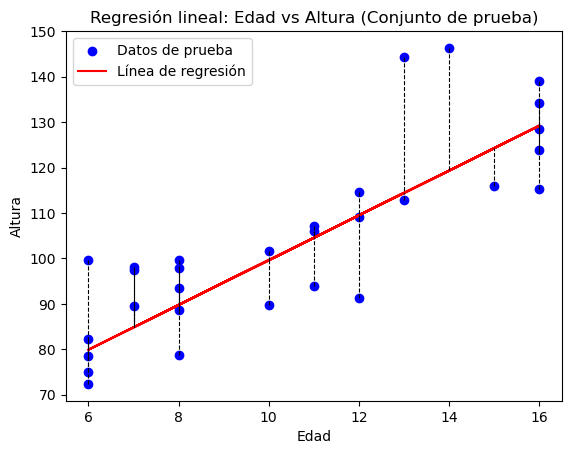

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Generación de datos simulados
np.random.seed(42)
ages = np.random.randint(5, 18, size=100)  # Edad entre 5 y 18 años
height_intercept = 50  # Altura base (en cm)
height_slope = 5       # Incremento de altura por cada año de edad
heights = height_intercept + height_slope * ages + np.random.normal(0, 10, size=100)  # Altura con ruido

# Crear un DataFrame
data = pd.DataFrame({'Age': ages, 'Height': heights})

# División en conjunto de entrenamiento y prueba (70-30)
X = data[['Age']]
y = data['Height']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluación del modelo en conjunto de prueba
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print("Resultados en el conjunto de prueba:")
print(f"Error absoluto medio (MAE): {mae}")
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R²): {r2}")


# Visualización de los errores
plt.scatter(X_test, y_test, color='blue', label='Datos de prueba')
plt.plot(X_test, y_test_pred, color='red', label='Línea de regresión')
for i in range(len(X_test)):
    plt.plot([X_test.iloc[i, 0], X_test.iloc[i, 0]], [y_test.iloc[i], y_test_pred[i]], 'k--', linewidth=0.8)  # Línea de error
plt.xlabel('Edad')
plt.ylabel('Altura')
plt.title('Regresión lineal: Edad vs Altura (Conjunto de prueba)')
plt.legend()
plt.show()
